In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, CuDNNLSTM

In [0]:
mnist = tf.keras.datasets.mnist  
(x_train, y_train),(x_test, y_test) = mnist.load_data()  

In [46]:
x_train = x_train/255.0
x_test = x_test/255.0

print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28)
(28, 28)


In [0]:
model = Sequential()


model.add(CuDNNLSTM(128, input_shape=(x_train.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))

model.add(CuDNNLSTM(128))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))


In [0]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

In [49]:
model.fit(x_train,
          y_train,
          epochs=3,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 14s 233us/sample - loss: 0.3881 - acc: 0.8802 - val_loss: 0.1002 - val_acc: 0.9686
Epoch 2/3
60000/60000 [==============================] - 13s 224us/sample - loss: 0.1176 - acc: 0.9692 - val_loss: 0.0772 - val_acc: 0.9780
Epoch 3/3
60000/60000 [==============================] - 13s 223us/sample - loss: 0.0851 - acc: 0.9768 - val_loss: 0.0679 - val_acc: 0.9811


In [52]:
classifications = model.predict(x_test)
print(classifications[0])
print('Predicted Number is:' + str(y_test[0]))

[4.4344635e-08 8.0062680e-05 9.0677402e-04 2.0571635e-03 1.1915569e-04
 7.4208045e-05 3.6344071e-07 9.9424344e-01 1.3240594e-05 2.5056528e-03]
Predicted Number is:7


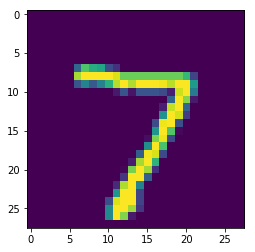

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_test[0])